In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in dataframe and clean
life_expect = pd.read_csv('life_expectancy.csv')
life_expect.columns= ['country', 'expect_female', 'expect_both', 'expect_male']
life_expect = life_expect[['country', 'expect_female','expect_male','expect_both']]

# spot_check
print(life_expect.describe())

       expect_female  expect_male  expect_both
count     200.000000   200.000000   200.000000
mean       76.776900    71.517200    74.133700
std         8.820332     8.419633     8.571318
min        54.940000    53.360000    54.640000
25%        71.300000    66.270000    68.732500
50%        77.955000    71.250000    74.700000
75%        81.985000    76.565000    79.062500
max       149.220000   137.640000   143.280000


In [3]:
# since there are 200 entries, I found a dataframe that assigns a continent. Merge and sift by continent
country_continent = pd.read_csv('Countries-Continents.csv')

# clean for merging
country_continent.columns = ['continent','country']
country_continent = country_continent[['country','continent']]

# merge df's
life_expect_continent = pd.merge(life_expect, country_continent, on='country')

# reorganize for readability
life_expect_continent = life_expect_continent[['continent','country','expect_female','expect_male','expect_both']]

# spot_check
# print(life_expect_continent.head())

In [4]:
# first, create a dataframe that averages life expectancies by country
continent_average_expect = life_expect_continent.groupby('continent').aggregate({'expect_female':'mean','expect_male':'mean','expect_both':'mean'})

# continent list for easier reference later:
continent_list = continent_average_expect.index

# spot check
print(continent_average_expect)

               expect_female  expect_male  expect_both
continent                                             
Africa             67.853333    63.396875    65.610208
Asia               77.903077    73.156923    75.485897
Europe             82.585500    76.826500    79.755500
North America      77.915263    72.104211    75.010526
Oceania            82.268000    77.293000    79.716000
South America      78.483333    72.568333    75.509167


In [5]:
# function for wraping text of labels
def wrap_label(lst):
    x_labels = []
    for l in lst:
        if ' ' in l:
            x_labels.append(l.replace(' ','\n'))
        else:
            x_labels.append(l)
    return x_labels

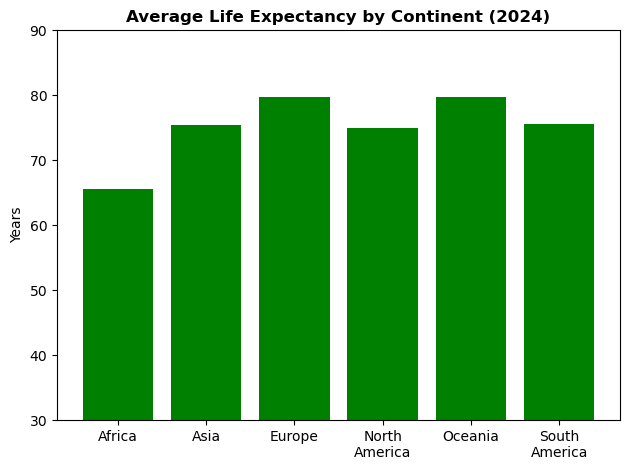

<Figure size 640x480 with 0 Axes>

In [6]:
# now create bar graphs to compare average life expectancy across countries
ax = plt.subplot()
plt.bar(continent_list,continent_average_expect['expect_both'], color='green')

# y-axis
plt.ylabel('Years')
plt.ylim(30,90)

# x-axis
ax.set_xticks(range(len(continent_list)))        
ax.set_xticklabels(wrap_label(continent_list))

# final touches
plt.title('Average Life Expectancy by Continent (2024)', fontweight='bold')
plt.tight_layout()
plt.savefig('continent_average_life_expectancy.jpg')
plt.show()
plt.clf()

In [7]:
# side-by-side bar graph for female and male data function
age_range = range(30,91,10)

def side_by_side_bar_2(side,df,x_list,fem_col,fem_label,fem_color,mal_col,mal_label,mal_color):
    # x values for females and male bar graph to plot on then x ticks for labels
    female_x = [2*e + .8*1 for e in range(len(x_list))]
    male_x = [2*e + .8*2 for e in range(len(x_list))]
    label_x = [(a+b)/2 for a,b in zip(female_x,male_x)]

    # initialize and plot the bar graphs
    if side == 2:
        ax = plt.subplot(1,2,side)
    else:
        ax = plt.subplot()
    plt.bar(female_x, df[fem_col], color=fem_color, label = fem_label)
    plt.bar(male_x, df[mal_col], color=mal_color, label = mal_label)
    
    # x-axis
    ax.set_xticks(label_x)
    ax.set_xticklabels(wrap_label(x_list))
    
    # y-axis
    plt.ylim(30,90)
    ax.set_yticks(age_range)
    plt.ylabel('Years')
    
    # finalize
    plt.legend()
    plt.title('Average Life Expectancy by Sex (2024)', fontweight='bold')
    plt.tight_layout()
    

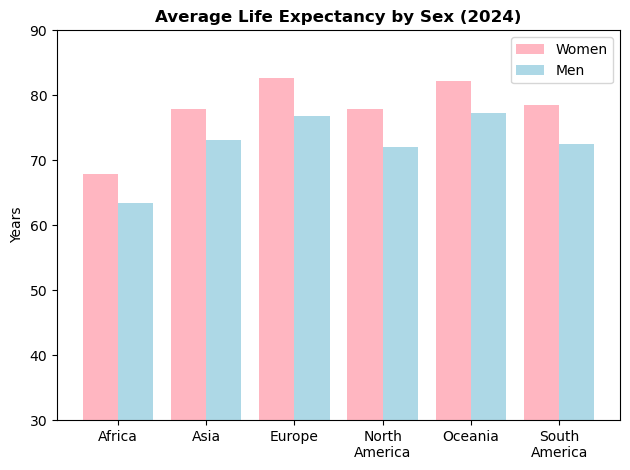

<Figure size 640x480 with 0 Axes>

In [8]:
# side_by_side_bar_2(df,x_list,fem_col,fem_label,fem_color,mal_col,mal_label,mal_color):

side_by_side_bar_2(1,continent_average_expect,continent_list,'expect_female','Women','lightpink','expect_male','Men','lightblue')
plt.savefig('continent_sex_life_expectancy.png')
plt.show()
plt.clf()

In [9]:
# appendix: maybe graph top and bottom life expectancies by continent
def country_continent_expect(continent, fem_label, fem_color, mal_label, mal_color, rank):
    #create segregated dataframe and country list
    df = life_expect_continent[life_expect_continent['continent'] == continent]
    
    
    df = df.sort_values(by = 'expect_both', ascending=False)
    
    #truncating to top x  for load and visual
    #use with care
    df = df[:rank]
    
    x_list = df['country']
    
    #plot both
    ax = plt.subplot(1,2,1)
    plt.bar(x_list, df['expect_both'])
    plt.title(continent + " Top 5 Countries (2024)".title(), fontweight='bold')
    
    #y-axis
    plt.ylim(30,90)
    ax.set_yticks(age_range)
    plt.ylabel('Years (Averaged)')
    
    #x-axis
    ax.set_xticks(range(len(x_list)))
    ax.set_xticklabels(wrap_label(x_list))
    
    #plot female_male
    side_by_side_bar_2(2,df,x_list,'expect_female', fem_label, fem_color, 'expect_male', mal_label, mal_color)
    

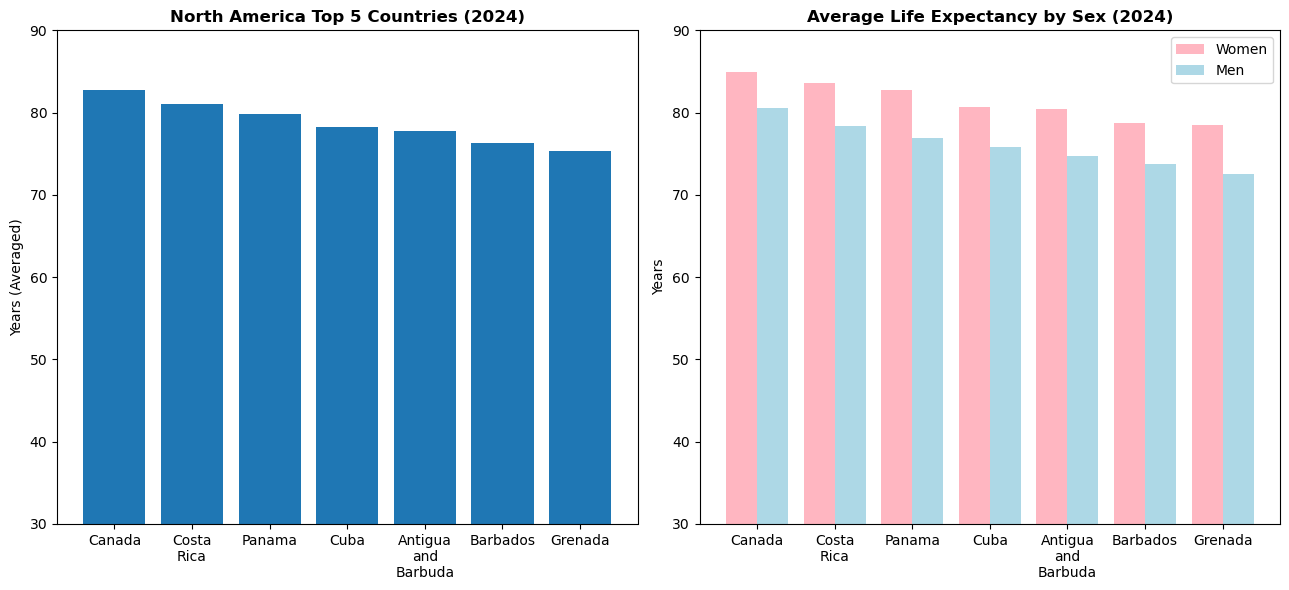

<Figure size 640x480 with 0 Axes>

In [10]:
# adust figsize (width,height) to size the plot
plt.figure(figsize=(13,6))

# proof of concept and spot check
country_continent_expect('North America', 'Women', 'lightpink', 'Men', 'lightblue',7)
plt.savefig('north_america_average_report.jpg')
plt.show()
plt.clf()

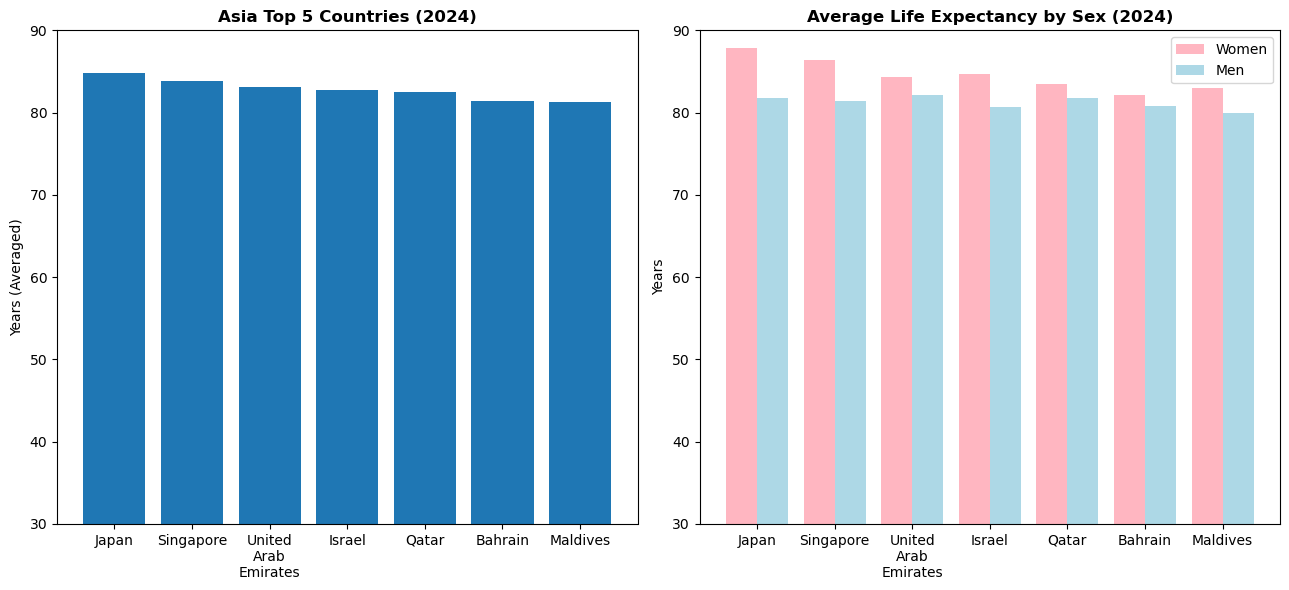

<Figure size 640x480 with 0 Axes>

In [11]:
# adust figsize (width,height) to size the plot
plt.figure(figsize=(13,6))

# proof of concept and spot check
country_continent_expect('Asia', 'Women', 'lightpink', 'Men', 'lightblue',7)
plt.savefig('asia_average_report.jpg')
plt.show()
plt.clf()

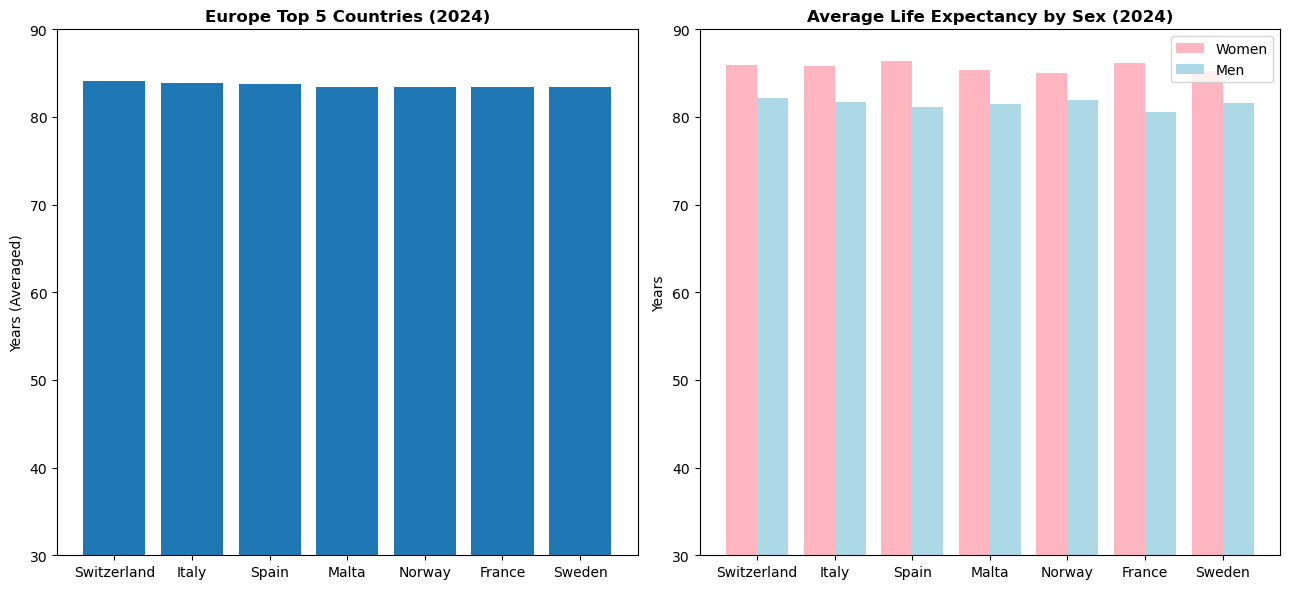

<Figure size 640x480 with 0 Axes>

In [12]:
# adust figsize (width,height) to size the plot
plt.figure(figsize=(13,6))

# proof of concept and spot check
country_continent_expect('Europe', 'Women', 'lightpink', 'Men', 'lightblue',7)
plt.savefig('europe_average_report.jpg')
plt.show()
plt.clf()

In [13]:
# incorporating GDP for 2024 to provide additional insight into possible disparity 
country_gdp = pd.read_csv('GDP by Country 1999-2024.csv')
# 2011 is missing from this data set. Irrelevant to the current venture, but note

# transpose since the countries are the columns, not the rows
country_gdp = country_gdp.T.reset_index()

# rename the columns and get only 2024
recorded_years = list(range(1999,2011))+list(range(2012,2025))
country_gdp.columns = ['country'] + recorded_years
country_gdp_2024 = country_gdp[['country',2024]][country_gdp['country'] != "Unnamed: 0"]

# Important to note that the number of accounted for GDP's drop in 2023, so for the GDP analysis will only be able to examine a select few. 41 countries in 2024
# print(country_gdp[2022].count())
# print(country_gdp_2024.count())

# merge dataframes then drop na's
life_expect_gdp_country = pd.merge(life_expect_continent, country_gdp_2024, on='country')
life_expect_gdp_country.columns = ['continent','country','expect_female','expect_male','expect_both','gdp']

le_gdp_trimmed = life_expect_gdp_country[['country','continent','gdp','expect_female','expect_male','expect_both']].dropna().sort_values(by='continent').reset_index(drop=True)
print(le_gdp_trimmed.head())

                country continent      gdp  expect_female  expect_male  \
0          South Africa    Africa   403.05          69.79        62.78   
1                 Egypt    Africa   380.04          74.01        69.65   
2                Israel      Asia   528.07          84.71        80.67   
3  United Arab Emirates      Asia   545.05          84.32        82.17   
4          Saudi Arabia      Asia  1100.71          81.33        77.33   

   expect_both  
0        66.31  
1        71.81  
2        82.73  
3        83.07  
4        78.98  


In [14]:
# first set context by showing GDP over time
target_countries_2024 = list(le_gdp_trimmed['country'])

# get all gdp's of the countries that have a gdp in 2024
target_country_dict = {}
for x in target_countries_2024:
    target_country_dict[x] = country_gdp[country_gdp['country'] == x].values[0][1:]
target_country_df = pd.DataFrame(target_country_dict).T.reset_index()
target_country_df.columns = ['country'] + recorded_years

In [15]:
# create function to plot 5 countries on 1 line plot

# default list will be the top 5 countries of 2024
default = target_country_df.sort_values(by=2024, ascending=False)['country'][:5]

# simple open line plot and a max for the values to determine the axis scale
def country_open_line(target,color):
    plot_list =list(target_country_df[target_country_df['country']==target].values)[0][1:] 
    plt.plot(plot_list, color = color)
    plot_max = int(round(np.max(plot_list)))
    return plot_max

# plots 5 countries on 1 graph
def plot_5(target_list= default):
    #initialize important components
    count = 0
    colors =['red','green','blue','pink','lightgreen']
    axis_range = []
    plt.figure(figsize=(12,8))
    
    #iterate through the values in country list
    for x in target_list:
        plot_max = country_open_line(x,colors[count])
        axis_range.append(plot_max)
        count += 1
    
    ax = plt.subplot()
    #y-axis
    top = int(round(np.max(axis_range)))
    y_ticks = list(range(0,top+10,int(round(top/10))))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(["$"+str(x)[:-3]+","+str(x)[-3:] if len(str(x)) > 3 else "$"+str(x) for x in y_ticks], fontsize = 8)
    
    #x-axis
    x_ticks = list(target_country_df.columns)[1:]
    ax.set_xticks(list(range(len(x_ticks))))
    ax.set_xticklabels(x_ticks, rotation=90, fontsize=8)
    
    #prepares and labels the axes and chart
    plt.title('GDP Over Time', fontweight='bold')
    plt.xlabel('Years',fontweight='bold',fontsize=10)
    plt.ylabel('GDP',fontweight='bold',fontsize=10)
    plt.legend(target_list)
    #keep open to save as a figure afterwards

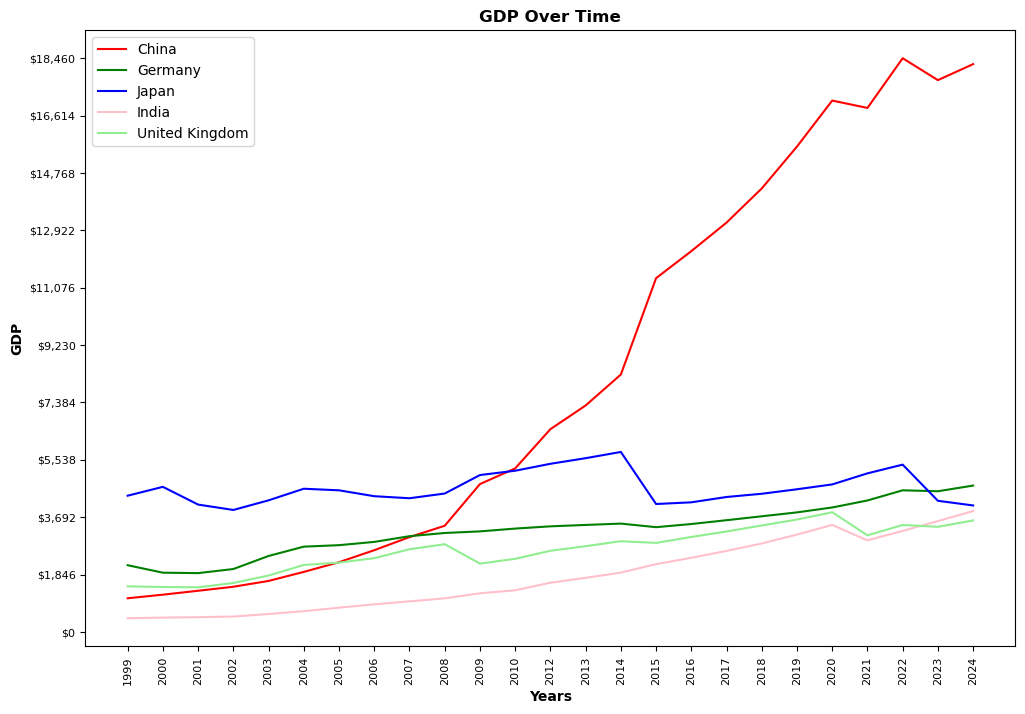

<Figure size 640x480 with 0 Axes>

In [16]:
plot_5()
plt.savefig('top_5_gdp.jpeg')
plt.show()
plt.clf()

In [17]:
# list of top 5 GDP in Europe in 2024 for presentation. North America only has Mexico and Canada strangely
eu_target_country = le_gdp_trimmed[le_gdp_trimmed['continent'] == 'Europe']
eu_target = eu_target_country.sort_values(by='gdp', ascending=False)['country']

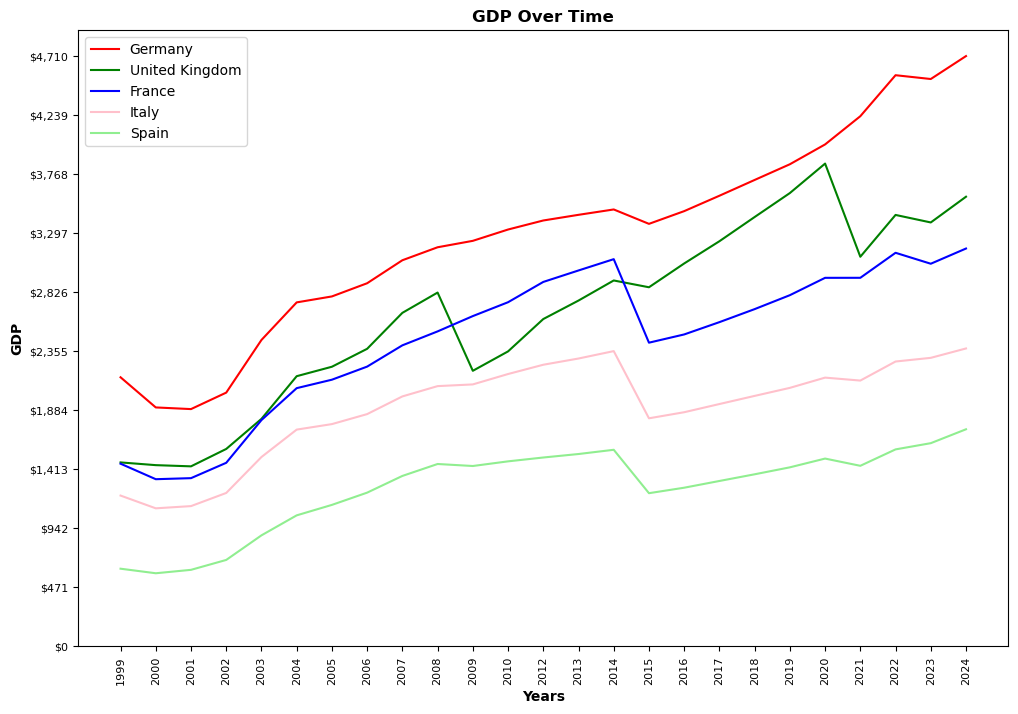

<Figure size 640x480 with 0 Axes>

In [18]:
plot_5(eu_target[:5])
plt.savefig("eu_gdp_overtime.jpeg")
plt.show()
plt.clf()

In [19]:
# list of top 5 GDP in Europe in 2024 for presentation. North America only has Mexico and Canada strangely
asia_target_country = le_gdp_trimmed[le_gdp_trimmed['continent'] == 'Asia']
asia_target = asia_target_country.sort_values(by='gdp', ascending=False)['country']

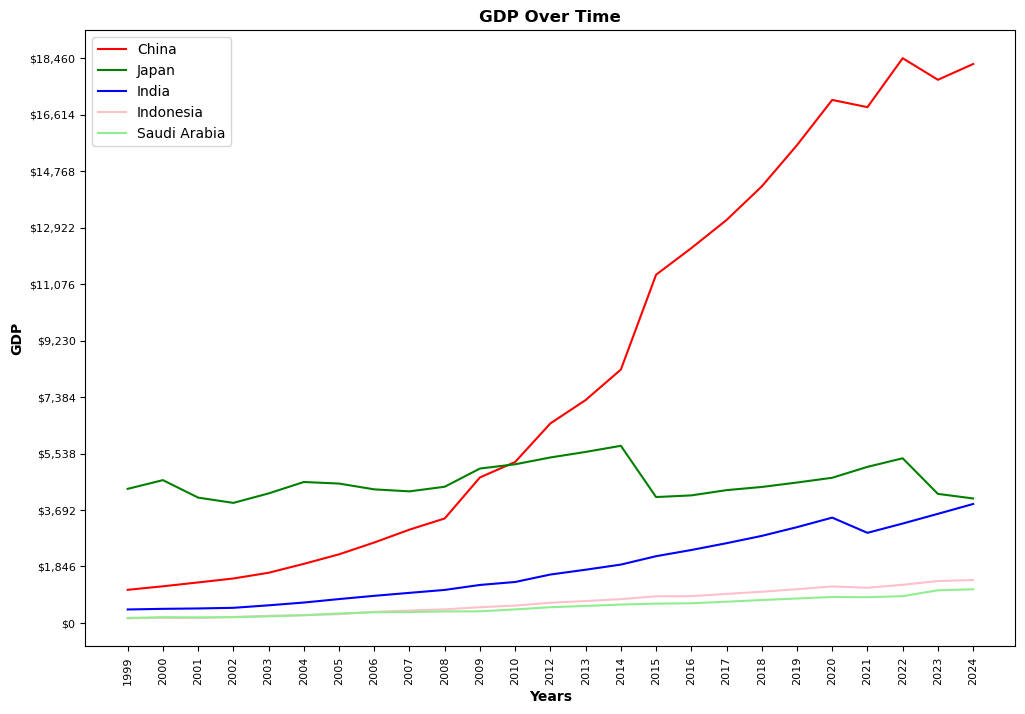

<Figure size 640x480 with 0 Axes>

In [20]:
plot_5(asia_target[:5])
plt.savefig("asia_gdp_overtime.jpeg")
plt.show()
plt.clf()

In [21]:
# next on the list bar graph to compare life expectancies and GDP. 4 subplots of the 5 countries plotting GDP, both LE, Female LE and Male LE
# use le_gdp_trimmed, eu_target & default

def country_quick_append(lst,measure,criterion):
    lst.append(le_gdp_trimmed[measure][le_gdp_trimmed['country'] == criterion].values[0])
    return lst

def def_int(number):
    result = int(round(number))
    return result

def bar_5_countries(targets,title):
    #initialize lists and components
    gdp = []
    both = []
    fem = []
    mal = []
    iteration_list = [gdp,both,fem,mal]
    title_list = ['GDP', 'Life Expectancy: Both Sexes', 'Life Expectancy: Female', 'Life Expectancy: Male']
    colors = plt.get_cmap("tab10").colors[:5]
    
    for x in targets:
        country_quick_append(gdp,'gdp',x)
        country_quick_append(both,'expect_both',x)
        country_quick_append(fem,'expect_female',x)
        country_quick_append(mal,'expect_male',x)
    
    plt.figure(figsize=(12,8))
    for x in range(len(title_list)):
        ax = plt.subplot(2,2,x+1)
        bars = plt.bar(targets,iteration_list[x], edgecolor='black', color = colors)
        plt.title(title_list[x],fontweight='bold')
        
        #x-axis
        ax.set_xticks(range(len(targets)))
        ax.set_xticklabels([x.replace(" ","\n") if " " in x else x for x in targets],fontsize=9)
        
        #y-axis
        if x == 0:
            top = def_int(np.max(gdp))
            y_ticks = range(0,top,def_int(top/10))
            ax.set_yticks(y_ticks)
            ax.set_yticklabels(["$"+str(x)[:-3]+","+str(x)[-3:] if len(str(x)) > 3 else "$"+str(x) for x in y_ticks],fontsize=7)
            plt.ylabel('GDP')
            plt.legend(bars, list(targets))
        else:
            plt.ylim(30,90)
            plt.yticks(range(30,91,10),fontsize=7)
            plt.ylabel('Life Expectancy (Years)')
        #color code to help track countries across plots
    plt.suptitle(title, fontweight='bold',fontsize=20)    
    plt.tight_layout()
    plt.subplots_adjust(hspace=.4, wspace=.2)

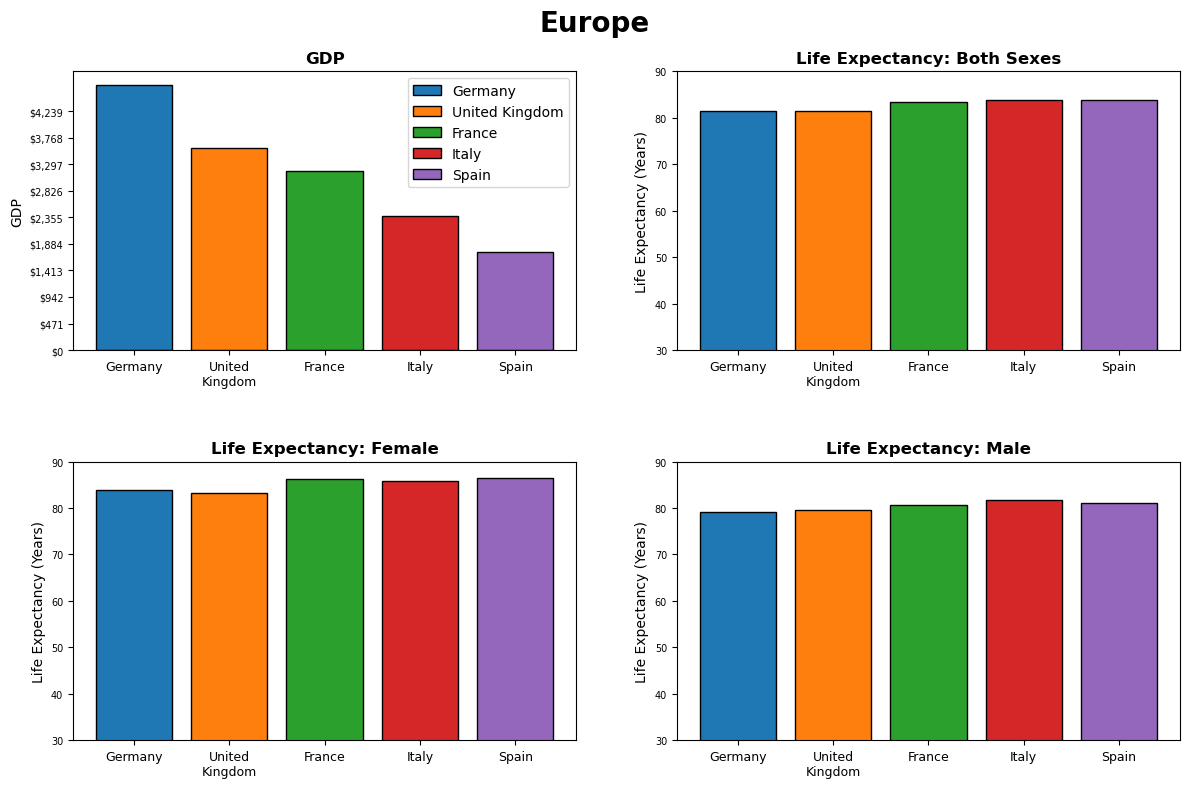

<Figure size 640x480 with 0 Axes>

In [22]:
bar_5_countries(eu_target[:5],'Europe')
plt.savefig('europe_quad.png')
plt.show()
plt.clf()

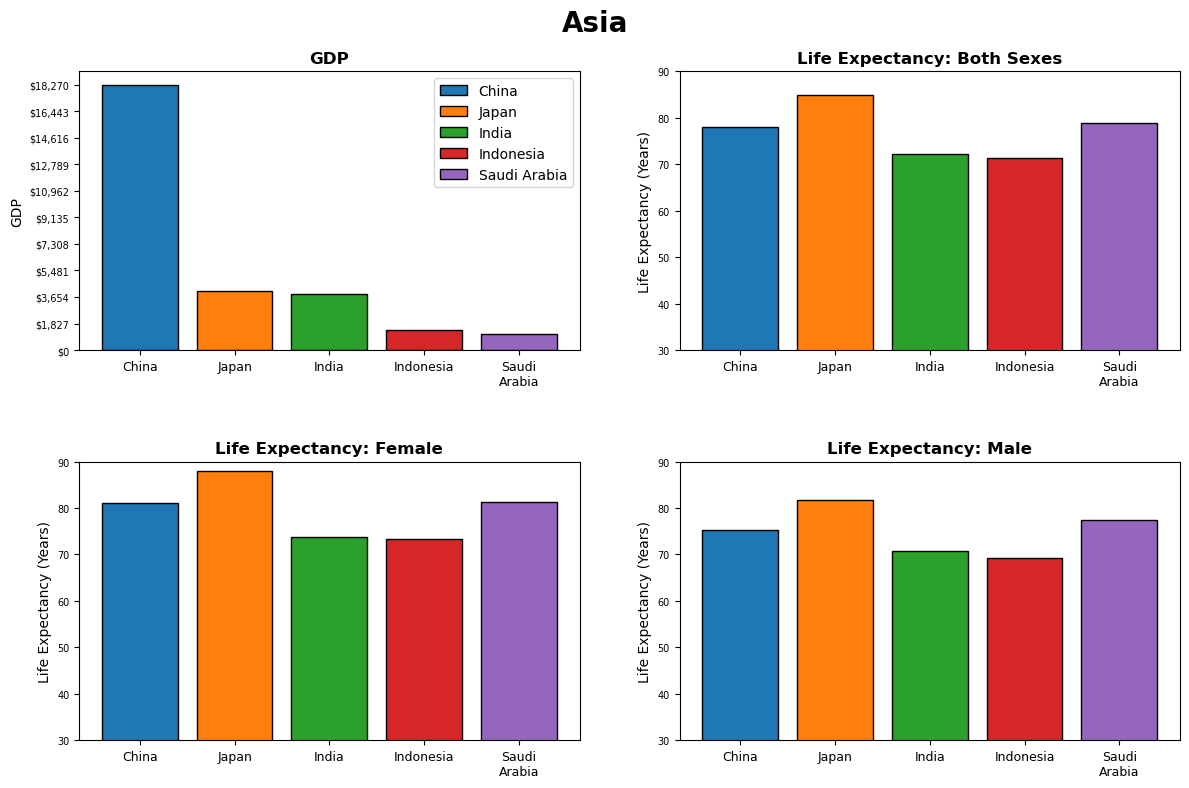

<Figure size 640x480 with 0 Axes>

In [23]:
bar_5_countries(asia_target[:5],'Asia')
plt.savefig('asia_quad.png')
plt.show()
plt.clf()

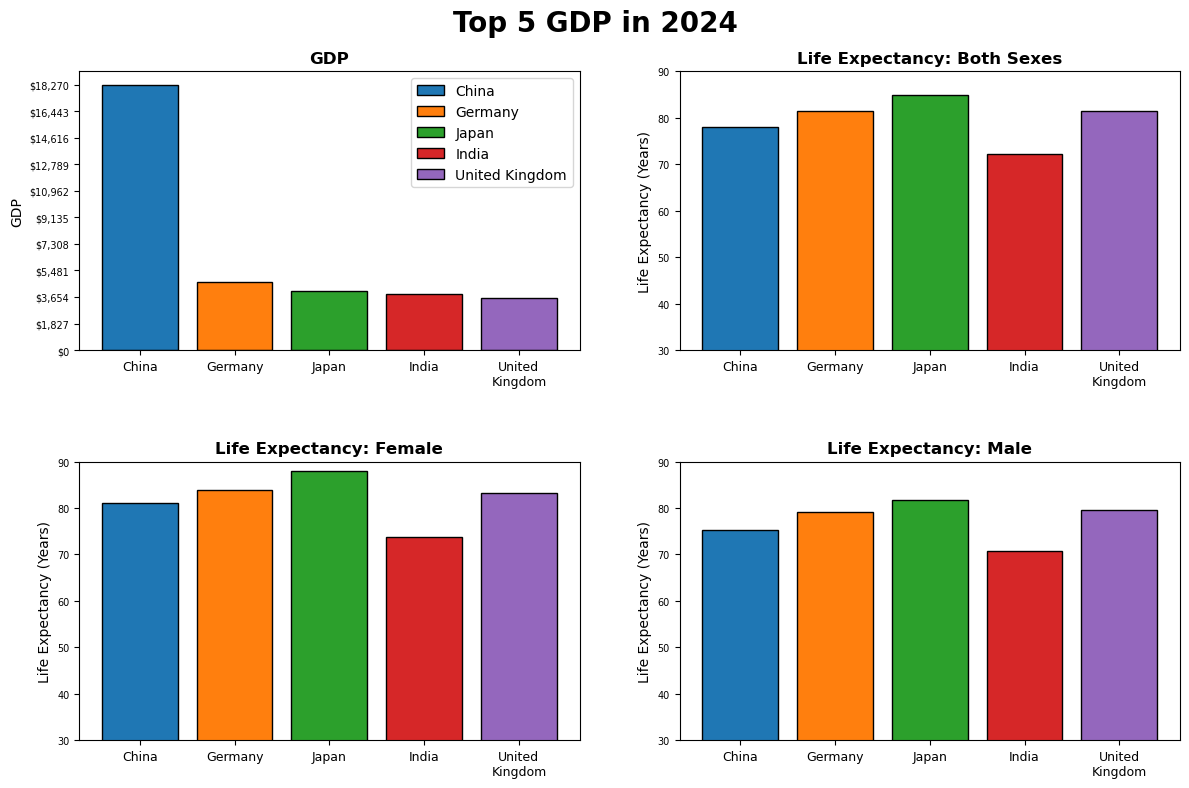

<Figure size 640x480 with 0 Axes>

In [24]:
bar_5_countries(default,'Top 5 GDP in 2024')
plt.savefig('top_quad.png')
plt.show()
plt.clf()